- Plantear bien la pregunta.

¿Regresión o clasificación?
¿Tipo de regresión y tipo de clasificación?
En este caso tenemos una base de datos que se llama “Synthetic Financial Datasets For Fraud Detection“ (Conjuntos de datos financieros sintéticos para la detección de fraudes), por lo cual se trabajará con Clasificación binaria. 

Exploración inicial 

- Indicar la fuente de dónde se toman los datos.
Dataset tomado de: https://www.kaggle.com/code/carmencastrogonzlez/fraud-detection-full-project-in-spanish/notebook

La variable isFraud (variable objetivo) es el indicador que indica si las transacciones son fraude con el valor 1 o no, con el valor 0, mientras que isFlaggedFraud es lo que el sistema previene de la transacción debido a que se activan algunos umbrales.


- Decir cuáles son los atributos (descripción breve de cada uno)

step  - mapea una unidad de tiempo en el mundo real. En este caso 1 paso es 1 hora de tiempo. Pasos totales 744 (simulación de 30 días).

type  - CASH-IN, CASH-OUT, DÉBITO, PAGO y TRANSFERENCIA.

amount  - monto de la transacción en moneda local.

nameOrig - cliente que inició la transacción

oldbalanceOrg - saldo inicial antes de la transacción

newbalanceOrig - nuevo saldo después de la transacción

nameDest - cliente que es el destinatario de la transacción

oldbalanceDest: destinatario del saldo inicial antes de la transacción. Tenga en cuenta que no hay información para clientes que comiencen con M (Comerciantes).

newbalanceDest - destinatario del nuevo saldo después de la transacción. Tenga en cuenta que no hay información para clientes que comiencen con M (Comerciantes).

isFraud: estas son las transacciones realizadas por los agentes fraudulentos dentro de la simulación. En este conjunto de datos específico, el comportamiento fraudulento de los agentes tiene como objetivo obtener ganancias tomando el control de las cuentas de los clientes e intentar vaciar los fondos transfiriéndolos a otra cuenta y luego cobrando del sistema.

isFlaggedFraud: el modelo comercial tiene como objetivo controlar las transferencias masivas de una cuenta a otra y marca los intentos ilegales. Un intento ilegal en este conjunto de datos es un intento de transferir más de 200.000 en una sola transacción.


- Practicar una primera exploración gráfica de los datos.

**Función objetivo**

La función escalón es la función de activación referente a la clasificación binaria, donde y devuelve valores de -1 o +1:

$ y = sign(x), \left \{ y: -1,  1 \right \}$

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
d=pd.read_csv("data_balanceada.csv")

In [ ]:
d.keys()

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER',
       'isFlaggedFraud', 'isFraud'],
      dtype='object')

In [ ]:
d

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFlaggedFraud,isFraud
0,139,265803.35,0.00,0.00,751669.39,1017472.74,0,1,0,0,0,0,0
1,589,11278.28,0.00,0.00,220970.84,232249.12,0,1,0,0,0,0,0
2,284,16363.06,35966.16,19603.10,0.00,0.00,0,0,0,1,0,0,0
3,37,107223.31,20752629.71,20859853.02,804594.62,571711.22,1,0,0,0,0,0,0
4,287,3678.25,0.00,0.00,0.00,0.00,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16421,743,339682.13,339682.13,0.00,0.00,339682.13,0,1,0,0,0,0,1
16422,743,6311409.28,6311409.28,0.00,0.00,0.00,0,0,0,0,1,0,1
16423,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,0,1,0,0,0,0,1
16424,743,850002.52,850002.52,0.00,0.00,0.00,0,0,0,0,1,0,1


- Clasificar: un conjunto de individuos en una serie de grupos, teniendo en cuenta que cad aindividuo solamente puede pertenecer a uno de ellos 

Descripcion tabular de los datos 

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16426 entries, 0 to 16425
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   amount          16426 non-null  float64
 2   oldbalanceOrg   16426 non-null  float64
 3   newbalanceOrig  16426 non-null  float64
 4   oldbalanceDest  16426 non-null  float64
 5   newbalanceDest  16426 non-null  float64
 6   CASH_IN         16426 non-null  int64  
 7   CASH_OUT        16426 non-null  int64  
 8   DEBIT           16426 non-null  int64  
 9   PAYMENT         16426 non-null  int64  
 10  TRANSFER        16426 non-null  int64  
 11  isFlaggedFraud  16426 non-null  int64  
 12  isFraud         16426 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 1.6 MB


In [ ]:
d.isnull().sum() # cantidad de elementos faltantes por cada variable 

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
CASH_IN           0
CASH_OUT          0
DEBIT             0
PAYMENT           0
TRANSFER          0
isFlaggedFraud    0
isFraud           0
dtype: int64

In [ ]:
d.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFlaggedFraud,isFraud
count,16426.000000,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,16426.000000,16426.000000,16426.000000,16426.000000,16426.000000,16426.000000,16426.000000
mean,306.763850,8.201540e+05,1.245401e+06,5.286141e+05,8.603087e+05,1.285583e+06,0.110617,0.430050,0.003714,0.165287,0.290332,0.000974,0.500000
std,193.584036,1.860112e+06,3.250161e+06,2.501223e+06,4.355745e+06,4.651907e+06,0.313667,0.495098,0.060828,0.371450,0.453930,0.031196,0.500015
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,3.712309e+04,1.008625e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,283.000000,1.729433e+05,1.196647e+05,0.000000e+00,0.000000e+00,1.295114e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,410.000000,5.396587e+05,7.995173e+05,0.000000e+00,5.238782e+05,1.097807e+06,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,743.000000,2.623419e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


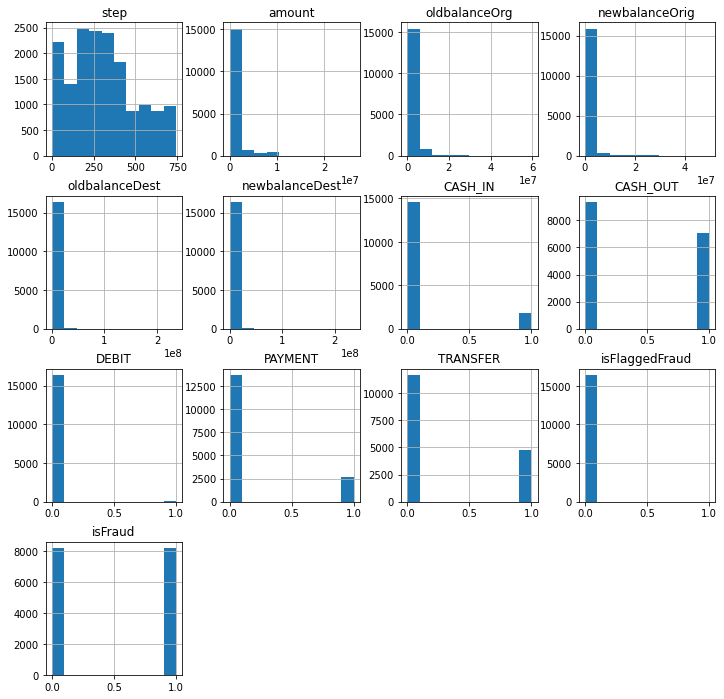

In [ ]:
d.hist(figsize=(12,12)) # Construye una cuadrícula de histogramas para cada variable numérica
plt.show()

In [ ]:
d.isnull().sum() # Cantidad de elementos faltantes por cada variable

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
CASH_IN           0
CASH_OUT          0
DEBIT             0
PAYMENT           0
TRANSFER          0
isFlaggedFraud    0
isFraud           0
dtype: int64

In [ ]:
#Matriz de correlacion
d.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFlaggedFraud,isFraud
step,1.000000,0.147428,0.076324,-0.019370,0.001201,0.027296,-0.104487,0.031867,-0.020410,-0.131790,0.148023,0.037229,0.318476
amount,0.147428,1.000000,0.647610,0.123301,0.002099,0.209443,-0.123360,0.046951,-0.026738,-0.193088,0.195620,0.067845,0.348276
oldbalanceOrg,0.076324,0.647610,1.000000,0.823875,0.003924,0.095766,0.257263,-0.101795,-0.021785,-0.161272,0.068145,0.063146,0.124387
newbalanceOrig,-0.019370,0.123301,0.823875,1.000000,0.030041,0.003838,0.459268,-0.181225,-0.010921,-0.083123,-0.050212,0.091002,-0.134427
oldbalanceDest,0.001201,0.002099,0.003924,0.030041,1.000000,0.951953,0.067040,0.096278,0.003027,-0.087893,-0.079817,-0.006168,-0.072564
newbalanceDest,0.027296,0.209443,0.095766,0.003838,0.951953,1.000000,0.021134,0.185311,-0.002564,-0.122979,-0.115744,-0.008630,-0.001263
CASH_IN,-0.104487,-0.123360,0.257263,0.459268,0.067040,0.021134,1.000000,-0.306343,-0.021531,-0.156934,-0.225573,-0.011012,-0.352669
CASH_OUT,0.031867,0.046951,-0.101795,-0.181225,0.096278,0.185311,-0.306343,1.000000,-0.053033,-0.386537,-0.555599,-0.027124,0.143626
DEBIT,-0.020410,-0.026738,-0.021785,-0.010921,0.003027,-0.002564,-0.021531,-0.053033,1.000000,-0.027168,-0.039051,-0.001906,-0.061053
PAYMENT,-0.131790,-0.193088,-0.161272,-0.083123,-0.087893,-0.122979,-0.156934,-0.386537,-0.027168,1.000000,-0.284623,-0.013895,-0.444990


In [ ]:
d.corr().isFraud.sort_values(ascending = False)  # Matriz de correlaciones 

isFraud           1.000000
TRANSFER          0.459360
amount            0.348276
step              0.318476
CASH_OUT          0.143626
oldbalanceOrg     0.124387
isFlaggedFraud    0.031225
newbalanceDest   -0.001263
DEBIT            -0.061053
oldbalanceDest   -0.072564
newbalanceOrig   -0.134427
CASH_IN          -0.352669
PAYMENT          -0.444990
Name: isFraud, dtype: float64

In [ ]:
from pandas.plotting import scatter_matrix
atributos_mejor_correlacionados = ['step', 'amount', 'oldbalanceOrg', \
                                   'CASH_OUT', 'TRANSFER', 'isFraud',\
                                   'newbalanceOrig', 'CASH_IN', 'PAYMENT']

scatter_matrix (d, figsize=(18,16)) # Gráfico conjunto de correlaciones

plt.savefig('scatter_isFraud.jpg')
plt.show()

- División en predictores y etiquetas

* Crear funciones en Python de manera que se puedan replicar los
procesos de transformación de datos en proyectos nuevos.

In [ ]:
# para separar entrenamiento y testeo:
from sklearn.model_selection import train_test_split 
# para llenar datos faltantes (mediana)
from sklearn.impute import SimpleImputer

from sklearn.base import BaseEstimator, TransformerMixin 
# Para estandarizar los datos (media 0 y varianza 1):
from sklearn.preprocessing import StandardScaler 
# Tratamiento de variables categóricas:
from sklearn.preprocessing import OneHotEncoder 
# Secuencia de imputació n, automatización del proceso:
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer

# Construcción del modelo predictivo 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error  
# otros modelos:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
d=pd.read_csv("data_balanceada.csv")
d

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFlaggedFraud,isFraud
0,139,265803.35,0.00,0.00,751669.39,1017472.74,0,1,0,0,0,0,0
1,589,11278.28,0.00,0.00,220970.84,232249.12,0,1,0,0,0,0,0
2,284,16363.06,35966.16,19603.10,0.00,0.00,0,0,0,1,0,0,0
3,37,107223.31,20752629.71,20859853.02,804594.62,571711.22,1,0,0,0,0,0,0
4,287,3678.25,0.00,0.00,0.00,0.00,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16421,743,339682.13,339682.13,0.00,0.00,339682.13,0,1,0,0,0,0,1
16422,743,6311409.28,6311409.28,0.00,0.00,0.00,0,0,0,0,1,0,1
16423,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,0,1,0,0,0,0,1
16424,743,850002.52,850002.52,0.00,0.00,0.00,0,0,0,0,1,0,1


In [ ]:
#Separamos los datos de entrenamiento y testeo (20% testeo y 80% entrenamiento)
d_train, d_test = train_test_split(d, test_size = 0.2, random_state = 42)

### Dividimos las variables predictoras de la variable objetivo

In [ ]:
data = d_train.drop('isFraud', axis=1)
y = d_train.isFraud
data


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFlaggedFraud
7332,181,32076.86,275890.00,243813.14,0.00,0.00,0,0,0,1,0,0
3016,45,2011.61,10007.00,7995.39,632383.75,634395.36,0,0,1,0,0,0
14627,579,1540624.70,1540624.70,0.00,78012.35,1618637.05,0,1,0,0,0,0
4747,201,233451.91,29.00,233480.91,0.00,0.00,1,0,0,0,0,0
2543,202,299.13,70028.00,69728.87,0.00,0.00,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,273,159106.12,159106.12,0.00,0.00,0.00,0,0,0,0,1,0
11964,336,170038.31,170038.31,0.00,0.00,0.00,0,0,0,0,1,0
5390,161,19426.31,84144.71,64718.41,0.00,0.00,0,0,0,1,0,0
860,256,368884.51,109567.00,0.00,0.00,368884.51,0,0,0,0,1,0


# *Estandarización*

In [ ]:
# No se escalan los datos de tipo variable dicotomica, por lo tanto solo se estandarizan 
# estas 6 variables: 'step', 'amount',"oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"

d_train[['step', 'amount',"oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]] = StandardScaler().fit_transform(d_train[['step', 'amount',"oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]])
d_test[['step', 'amount',"oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]] = StandardScaler().fit_transform(d_test[['step', 'amount',"oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]])

d_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFlaggedFraud,isFraud
7332,-0.653115,-0.425079,-0.301058,-0.112127,-0.199771,-0.280316,0,0,0,1,0,0,0
3016,-1.354309,-0.441419,-0.385094,-0.208757,-0.049268,-0.139092,0,0,1,0,0,0,0
14627,1.398909,0.394821,0.098680,-0.212033,-0.181205,0.080012,0,1,0,0,0,0,1
4747,-0.549998,-0.315631,-0.388247,-0.116361,-0.199771,-0.280316,1,0,0,0,0,0,0
2543,-0.544842,-0.442350,-0.366123,-0.183461,-0.199771,-0.280316,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-0.178778,-0.356038,-0.337969,-0.212033,-0.199771,-0.280316,0,0,0,0,1,0,1
11964,0.146040,-0.350096,-0.334514,-0.212033,-0.199771,-0.280316,0,0,0,0,1,0,1
5390,-0.756232,-0.431954,-0.361661,-0.185514,-0.199771,-0.280316,0,0,0,1,0,0,0
860,-0.266427,-0.242023,-0.353626,-0.212033,-0.199771,-0.198198,0,0,0,0,1,0,0


4. Entrenamiento y selección de modelo.

* Instanciar varios modelos y entrenarlos sobre datos de entrenamiento
preparados.

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

sgdclass=SGDClassifier(random_state = 0)
forest=RandomForestClassifier(random_state = 0)

#Simplemente se usa fit y se entran tanto datos de entrenamiento como los y
sgdclass.fit(d_train, y)
forest.fit(d_train, y)

RandomForestClassifier(random_state=0)

Matriz de confusión para escoger modelo 

In [52]:
# Simplemente se presentan los mismos modelos pero con el comando nuevo
# de cross_val_predict y la cantidad de cv

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix 


Pred_sgd = cross_val_predict(sgdclass, d_train, y, cv = 3 )
Pred_forest = cross_val_predict(forest, d_train, y, cv = 3 )

mc_sgd = confusion_matrix(y, Pred_sgd)
mc_forest = confusion_matrix(y, Pred_forest)

In [ ]:
print('Matriz de confusión Forest\n\n', mc_forest)

# La matriz de confusión del modelo forest nos dice que hubo una clasificación
# 100% pefecta, donde ninguno de los datos fueron mal clasificados

Matriz de confusión Forest

 [[6564    0]
 [   0 6576]]


In [53]:
print('Matriz de confusión SGD\n\n', mc_sgd)

# La matriz de confusión del modelo SGD nos dice que hubo una clasificacion un poco
# más baja para el conjunto de datos donde 18 personas fueron clasificadas como
# fraude, y 9 personas que cometieron fraude fueron clasificados como aquellos que no
# lo cometieron, aún así debe tener en cuenta que son muy pocos dato aquellos mal 
# clasificados pero en comparación con el modelo Forest es un modelo que sí comete 
# errores.

Matriz de confusión SGD

 [[6546   18]
 [   9 6567]]


**Validación Cruzada**

Puntajes de los modelos mediante accuracy.

In [54]:
Pt_sgd = cross_val_score(sgdclass, d_train, y, cv = 4, scoring="accuracy" )
Pt_forest = cross_val_score(forest, d_train, y, cv = 4 ,scoring="accuracy")

print('Precisión del modelo Forest: ', Pt_forest)
print('Precisión del modelo SGD: ', Pt_sgd)
# Nos quedamos con el modelo de Forest, su accuracy (Exactitud) es mejor.
# Aún así no descartamos el modelo SGD ya que practicamente su accuracy es 1 en todos los casos.


# Hay que tener cuidado con el accuracy o precision esta medida nos proporciona 
# la calidad de la predicción: ¿qué porcentaje de los que hemos dicho que son la 
# clase positiva, en realidad lo son? Hemos destacado que la métrica accuracy (exactitud)
# es engañosa cuando las clases están desbalanceadas. Cuando decimos que es engañosa 
# nos referimos a que nos hace creer que el modelo es mejor de lo que en realidad es.
# Por esto es claro motivo de sospecha para los resultados anteriores.

Precisión del modelo Forest:  [1. 1. 1. 1.]
Precisión del modelo SGD:  [0.99969559 1.         0.99604262 0.99878234]


**Afinamiento del modelo**

Grilla de hiperparámetros 

In [55]:
#Parametros para testeo de los modelos

Param_sgd={
    "alpha":[1,0.1],
    "penalty":['l1', 'l2']
}

Param_forest={
    "max_depth":[10,15,20],
    "max_features":[3,5,7],
    "n_estimators":[100,150,200]
}

In [56]:
# Se crea la grilla de parámetros
# F1 combina Precision y Recall en una sola medida esto teniendo en cuenta que no podremos
# guiarnos de la precisión o accuracy que en el punto anterior nos proporcionaron los modelos
# esto ya que un accuracy de 1 es motivo de cuestionamientos

Grilla_sgd= GridSearchCV(sgdclass,Param_sgd,cv=3,scoring = 'f1_macro')

Grilla_forest= GridSearchCV(forest,Param_forest,cv=3,scoring = 'f1_macro')

In [57]:
%%time

Grilla_sgd.fit(d_train,y)
Grilla_forest.fit(d_train,y)

CPU times: user 1min 8s, sys: 555 ms, total: 1min 8s
Wall time: 1min 8s


In [58]:
Grilla_sgd.best_params_ 
Grilla_forest.best_params_ 

{'max_depth': 10, 'max_features': 3, 'n_estimators': 100}

Combinación de hiperparametros que devuelven el mejor modelo

In [59]:
# Modelos Forest y SGD con mejor combinación de hiperparámetros.

Mejor_forest=Grilla_forest.best_estimator_
Mejor_sgd=Grilla_sgd.best_estimator_

In [60]:
y_test=d_test.isFraud

# Precisión con datos e testeo

print("Precisión datos de testeo para Forest:",Mejor_forest.score(d_test, y_test))
print("Precisión datos de testeo para Forest:",Mejor_sgd.score(d_test, y_test))

Precisión datos de testeo para Forest: 1.0
Precisión datos de testeo para Forest: 1.0


Note que para los datos de testeo y entrenamiento tenemos una precisión supremamente grande, esto se puede deber a que los datos están organizados para ser clasificados, este trabajo pretende mostrar el funcionamiento de los modelos SGD y random Forest para clasificación binaria pero hay que tener cuidado con futuros proyectos y nuevas entradas en la base de datos ya que los modelos funcionan a la perfección con este dataset, pero para clsificar nuevas entradas podríamos estar cometiendo errores ya que los modelos usados estarían ya acostumbrados a este dataset.
